In [3]:
import pandas as pd

In [4]:
interactions_df = pd.read_csv("interactions_cleaned.csv")
users_df = pd.read_csv("users_cleaned.csv")
products_df = pd.read_csv("products_cleaned.csv")

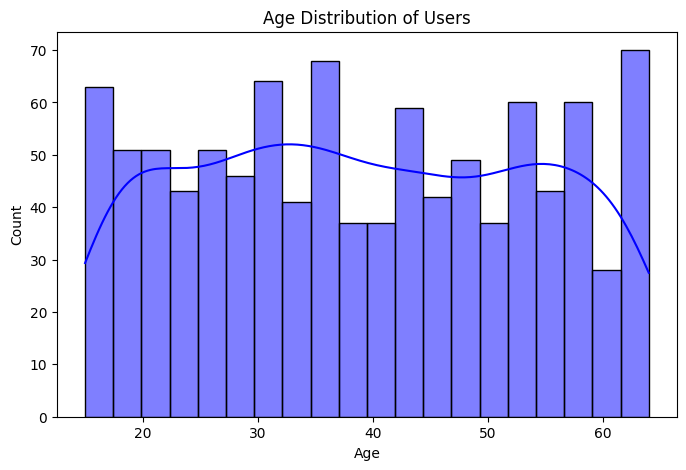

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert timestamp column to datetime
interactions_df["timestamp"] = pd.to_datetime(interactions_df["timestamp"])

# Plot 1: Age distribution of users
plt.figure(figsize=(8, 5))
sns.histplot(users_df["age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_19256\757673775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=users_df, palette="coolwarm")


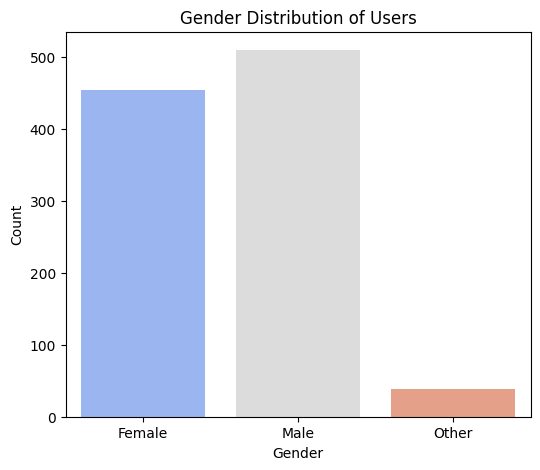

In [6]:

# Plot 2: Gender distribution in dataset
plt.figure(figsize=(6, 5))
sns.countplot(x="gender", data=users_df, palette="coolwarm")
plt.title("Gender Distribution of Users")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_19256\4140335015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="location", data=users_df, order=users_df["location"].value_counts().index, palette="viridis")


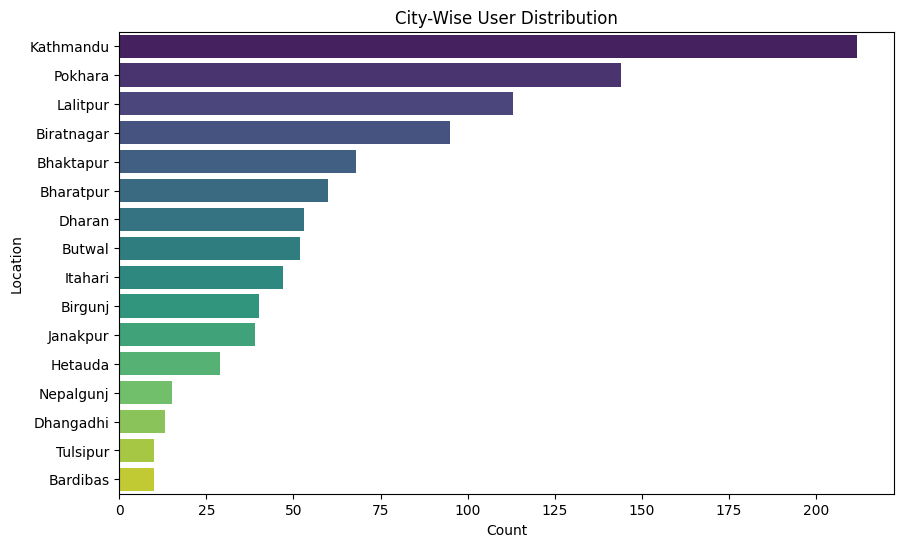

In [7]:

# Plot 3: City-wise online shopping participation
plt.figure(figsize=(10, 6))
sns.countplot(y="location", data=users_df, order=users_df["location"].value_counts().index, palette="viridis")
plt.title("City-Wise User Distribution")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_19256\3728526798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=most_purchased["category"], order=most_purchased["category"].value_counts().index, palette="rocket")


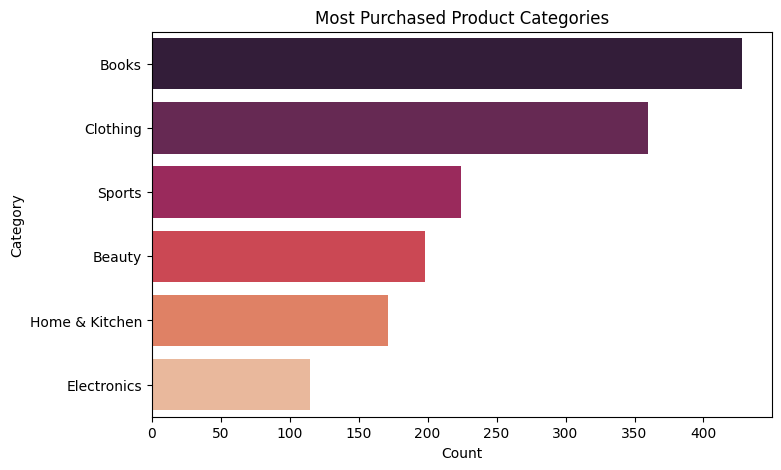

In [8]:

# Plot 4: Most purchased product categories
most_purchased = interactions_df[interactions_df["interaction_type"] == "purchase"].merge(products_df, on="product_id")
plt.figure(figsize=(8, 5))
sns.countplot(y=most_purchased["category"], order=most_purchased["category"].value_counts().index, palette="rocket")
plt.title("Most Purchased Product Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_19256\2011486940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="interaction_type", data=interactions_df, palette="pastel")


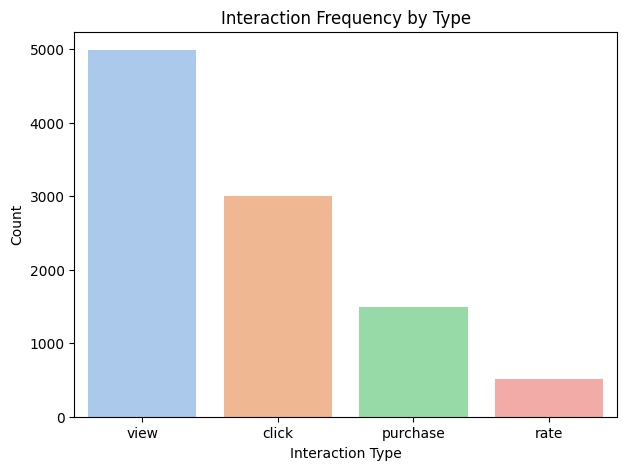

In [9]:

# Plot 5: Interaction frequency for different interaction types
plt.figure(figsize=(7, 5))
sns.countplot(x="interaction_type", data=interactions_df, palette="pastel")
plt.title("Interaction Frequency by Type")
plt.xlabel("Interaction Type")
plt.ylabel("Count")
plt.show()



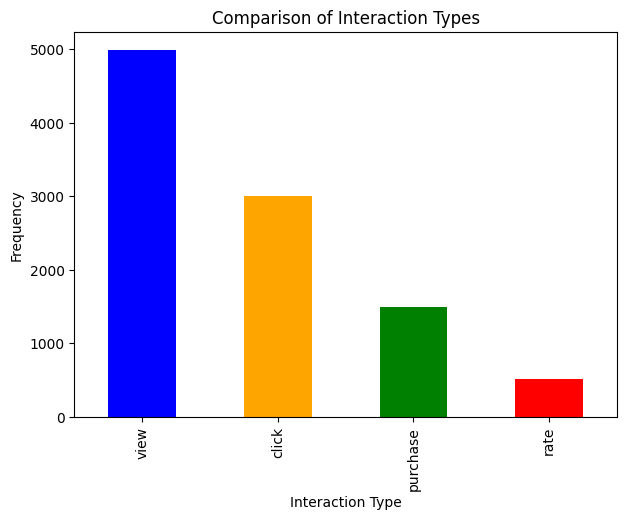

In [10]:
# Plot 6: Purchase frequency vs. Views
interaction_counts = interactions_df["interaction_type"].value_counts()
plt.figure(figsize=(7, 5))
interaction_counts.plot(kind="bar", color=["blue", "orange", "green", "red"])
plt.title("Comparison of Interaction Types")
plt.xlabel("Interaction Type")
plt.ylabel("Frequency")
plt.show()



C:\Users\acer\AppData\Local\Temp\ipykernel_19256\1366201194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="category", y="price", data=products_df, palette="coolwarm")


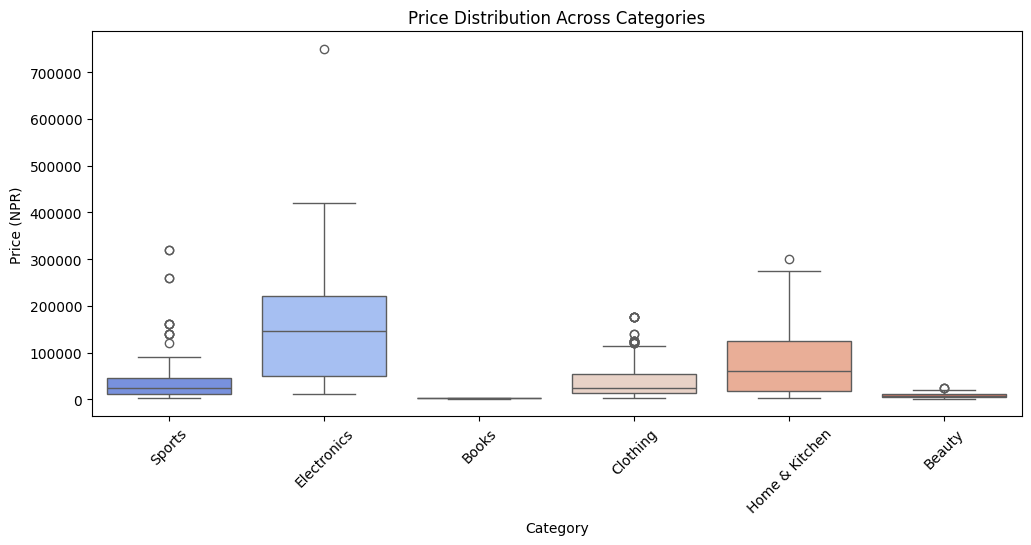

In [11]:
# Plot 7: Price distribution across categories
plt.figure(figsize=(12, 5))
sns.boxplot(x="category", y="price", data=products_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Price Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Price (NPR)")
plt.show()


In [12]:
# Conclusion: Hybrid Model (LSTM + SVD)
print("🔹 **Findings from EDA:**")
print("- Users have diverse age groups, so sequential learning (LSTM) is needed.")
print("- Gender and city preferences affect purchases, so collaborative filtering (SVD) is important.")
print("- Different product categories have different purchasing trends, supporting hybrid recommendations.")
print("✅ **Suggested Model: Hybrid LSTM + SVD for better personalization!**")

🔹 **Findings from EDA:**
- Users have diverse age groups, so sequential learning (LSTM) is needed.
- Gender and city preferences affect purchases, so collaborative filtering (SVD) is important.
- Different product categories have different purchasing trends, supporting hybrid recommendations.
✅ **Suggested Model: Hybrid LSTM + SVD for better personalization!**


In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse, mae

# Prepare data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(interactions_df[['user_id', 'product_id', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Train the SVD model
svd_model = SVD()
svd_model.fit(trainset)

# Predictions on test data
predictions = svd_model.test(testset)

# Evaluate Model Performance
print("📌 **SVD Evaluation Metrics**")
print(f"RMSE: {rmse(predictions)}")  # Lower RMSE is better
print(f"MAE: {mae(predictions)}")    # Lower MAE is better
